### Data Science Lab - Day 9 : K-Means Algorithm

Subhronil Saha <br>
CSE 3E <br>
Roll 70 <br>
Enrolment No.: 12018009019410 <br>

In [1]:
import warnings
#warnings - module to handle warnings in python 3.7

warnings.filterwarnings("ignore")
# filterwarnings() - function which belongs to he module warnings.
# 'ignore' ignores all warning messages inn jupyter

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
import pandas as pd

In [5]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters = 3, init = "random", algorithm = "full")
# n_cluster => how many clusters we want
# init => Initialisation : How we are initializing the centroid of each cluster
# algorithm => Many algos are used. We use full.

model.fit(data)
# fitting data for further analysis

KMeans(algorithm='full', init='random', n_clusters=3)

In [9]:
from matplotlib import pyplot as plt
# matplotlib is library
# pyplot is module
#plt is identifier for pyplot

%matplotlib inline
# magic fn to print any graph, chart etc in jupyter nb itself

In [10]:
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


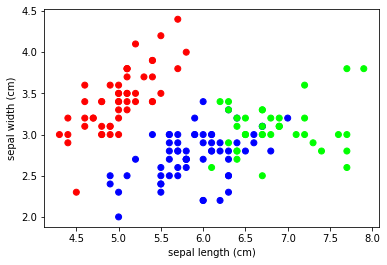

In [11]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = model.labels_, cmap = 'brg')
# c => color
# every labels, ie 9, 1, 2 must be represented in separate colors
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

In [12]:
from sklearn.metrics.cluster import silhouette_score
print(silhouette_score(data, model.labels_))

0.5528190123564091


In [13]:
k_range = range(2, 50)
score = []
for k in k_range:
    model = KMeans(n_clusters = k, init = "random", algorithm = "full")
    model.fit(data)
    score.append(silhouette_score(data, model.labels_))

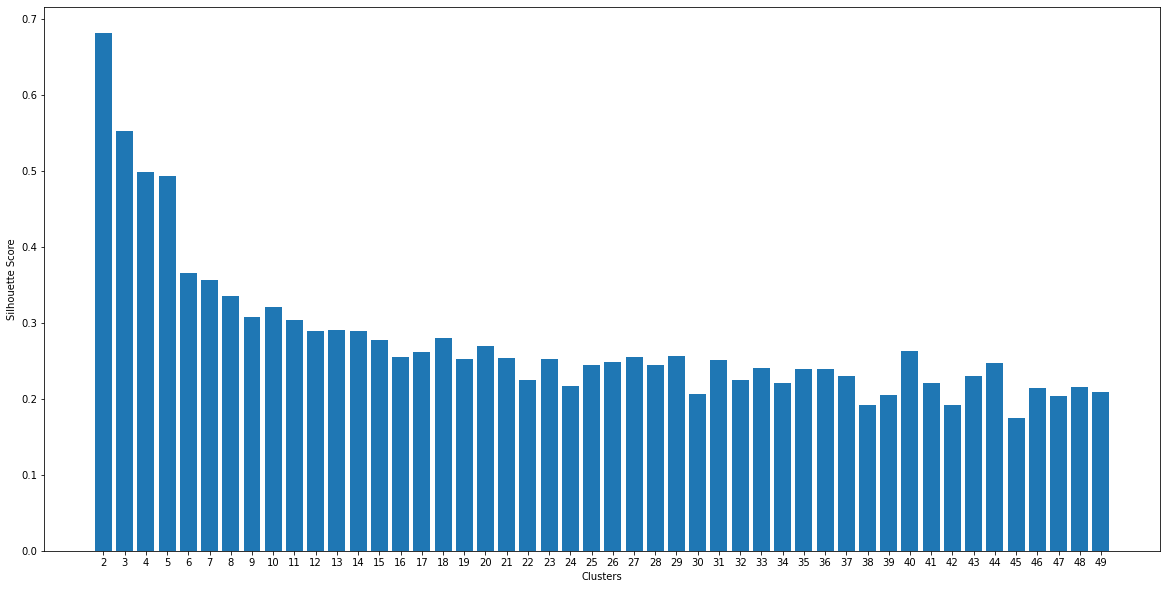

In [14]:
plt.figure(figsize=(20, 10))
plt.bar(k_range, score)
plt.xticks(k_range)
plt.xlabel('Clusters')
plt.ylabel('Silhouette Score')
plt.show()